In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load dataset (using only first 2 features for visualization)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Features: Sepal length and Sepal width
y = iris.target

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)
dt_model.fit(X_train, y_train)

# Prediction
y_pred = dt_model.predict(X_test)

dt_model

DecisionTreeClassifier(max_depth=2, random_state=42)

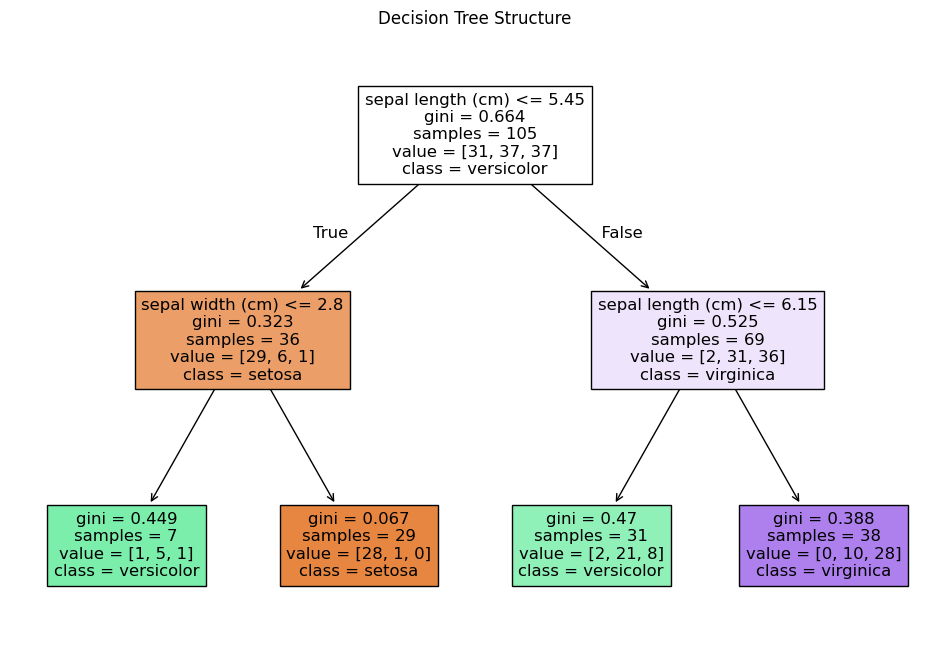

In [25]:
# Optional: Visualize the tree structure itself
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=iris.feature_names[:2], class_names=iris.target_names, filled=True)
plt.title("Decision Tree Structure")
plt.show()


In [27]:
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-score (macro):", f1_score(y_test, y_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7555555555555555
Precision (macro): 0.7434640522875817
Recall (macro): 0.7422402159244265
F1-score (macro): 0.7358730158730159
Confusion Matrix:
 [[16  3  0]
 [ 0  7  6]
 [ 0  2 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91        19
           1       0.58      0.54      0.56        13
           2       0.65      0.85      0.73        13

    accuracy                           0.76        45
   macro avg       0.74      0.74      0.74        45
weighted avg       0.78      0.76      0.76        45



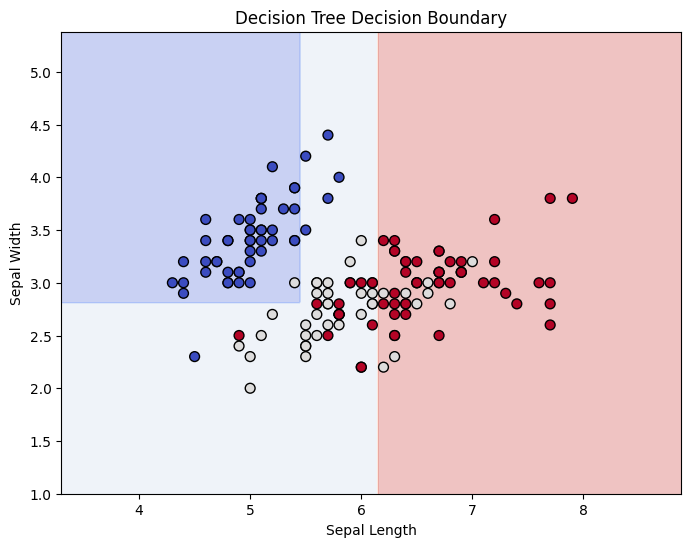

In [29]:

# Visualization of decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = dt_model.predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.coolwarm)
plt.title('Decision Tree Decision Boundary')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

